**Connecting Drive**

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
!pwd

/content


In [5]:
!ls

drive  household_power_consumption.csv	sample_data


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("/content/drive/MyDrive/household_power_consumption.csv")

In [8]:
df

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...
...,...
2075254,26/11/2010;20:58:00;0.946;0.000;240.430;4.000;...
2075255,26/11/2010;20:59:00;0.944;0.000;240.000;4.000;...
2075256,26/11/2010;21:00:00;0.938;0.000;239.820;3.800;...
2075257,26/11/2010;21:01:00;0.934;0.000;239.700;3.800;...


In [9]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'])

<ipython-input-9-ceb7712513b0>:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'])
<ipython-input-9-ceb7712513b0>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'])
<ipython-input-9-ceb7712513b0>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=Fal

In [10]:
df

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [11]:
# Select relevant columns and preprocess
df = df[['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]
df.dropna(inplace=True)

<ipython-input-11-c621e961bd46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [12]:
df.loc[:, 'Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df.loc[:, 'Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df.loc[:, 'Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df.loc[:, 'Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')


In [13]:
print(df.columns)

Index(['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity'],
      dtype='object')


In [14]:
# Generate a datetime column with a 1-minute interval
df['datetime'] = pd.date_range(start='2024-01-01 00:00:00', periods=len(df), freq='min')

# Set 'datetime' as the index
df.set_index('datetime', inplace=True)

# Resample data to hourly
df_resampled = df.resample('h').mean()

<ipython-input-14-095bf1766724>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.date_range(start='2024-01-01 00:00:00', periods=len(df), freq='min')


In [15]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
datetime,,,,
2024-01-01 00:00:00,4.216,0.418,234.84,18.4
2024-01-01 00:01:00,5.360,0.436,233.63,23.0
2024-01-01 00:02:00,5.374,0.498,233.29,23.0
2024-01-01 00:03:00,5.388,0.502,233.74,23.0
2024-01-01 00:04:00,3.666,0.528,235.68,15.8
...,...,...,...,...
2027-11-24 02:35:00,0.946,0.000,240.43,4.0
2027-11-24 02:36:00,0.944,0.000,240.00,4.0
2027-11-24 02:37:00,0.938,0.000,239.82,3.8


**Data Distribution**

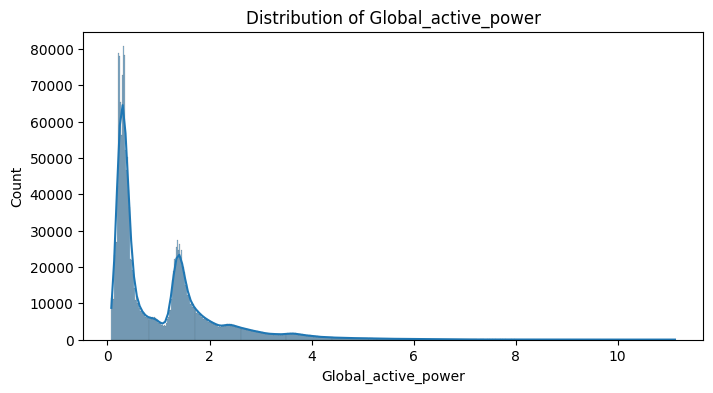

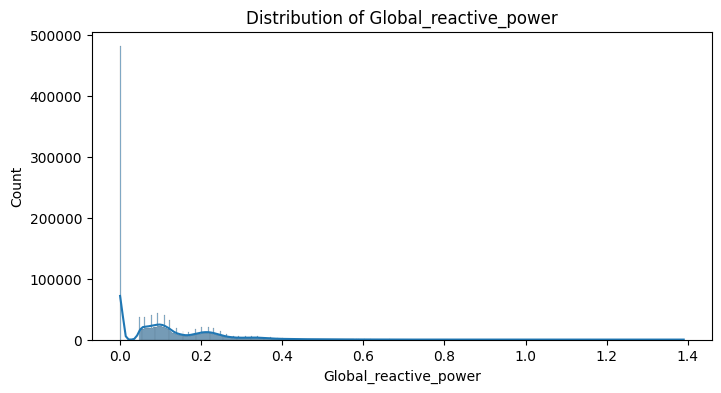

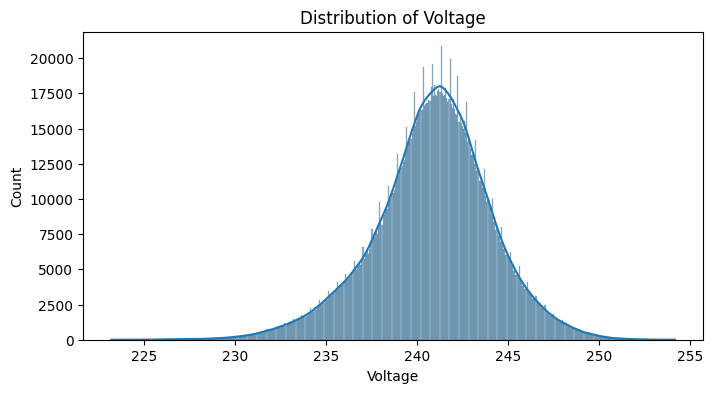

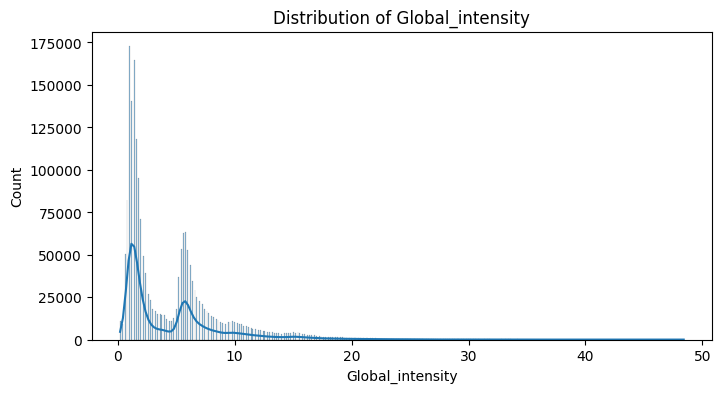

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [17]:
from scipy.stats import skew

# Compute skewness
for col in df.columns:
    print(f"Skewness of {col}: {skew(df[col].dropna())}")

Skewness of Global_active_power: 1.7862320846320818
Skewness of Global_reactive_power: 1.261913273793962
Skewness of Voltage: -0.32666473658064815
Skewness of Global_intensity: 1.8490985505960675


In [18]:
import numpy as np

# Apply log transformation to positively skewed features
df['Global_active_power'] = np.log1p(df['Global_active_power'])
df['Global_reactive_power'] = np.log1p(df['Global_reactive_power'])
df['Global_intensity'] = np.log1p(df['Global_intensity'])

# Re-check the distribution
from scipy.stats import skew

# Compute skewness after transformation
for col in ['Global_active_power', 'Global_reactive_power', 'Global_intensity']:
    print(f"Skewness of {col} after log transformation: {skew(df[col].dropna())}")

Skewness of Global_active_power after log transformation: 0.7394033993766925
Skewness of Global_reactive_power after log transformation: 0.9115075133976244
Skewness of Global_intensity after log transformation: 0.39041833105152


<ipython-input-18-8740b51bebdd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Global_active_power'] = np.log1p(df['Global_active_power'])
<ipython-input-18-8740b51bebdd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Global_reactive_power'] = np.log1p(df['Global_reactive_power'])
<ipython-input-18-8740b51bebdd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [19]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Verify the scaled data
print(df_scaled.describe())

       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean         -4.078769e-16           3.100303e-16 -1.337721e-14   
std           1.000000e+00           1.000000e+00  1.000000e+00   
min          -1.314673e+00          -1.169281e+00 -5.444424e+00   
25%          -8.593744e-01          -6.794748e-01 -5.709463e-01   
50%          -3.865752e-01          -1.735481e-01  5.251320e-02   
75%           6.771766e-01           6.831176e-01  6.327626e-01   
max           4.332633e+00           7.933374e+00  4.108086e+00   

       Global_intensity  
count      2.049280e+06  
mean      -1.003569e-16  
std        1.000000e+00  
min       -1.836653e+00  
25%       -8.481054e-01  
50%       -2.698422e-01  
75%        7.577809e-01  
max        3.465327e+00  


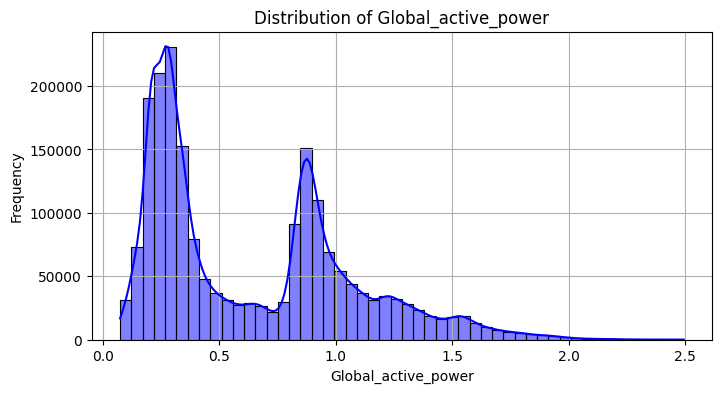

Global_active_power - Skewness: 0.74, Kurtosis: -0.34


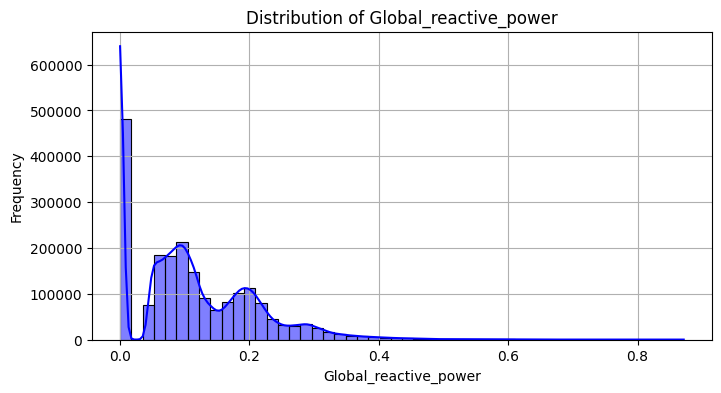

Global_reactive_power - Skewness: 0.91, Kurtosis: 0.96


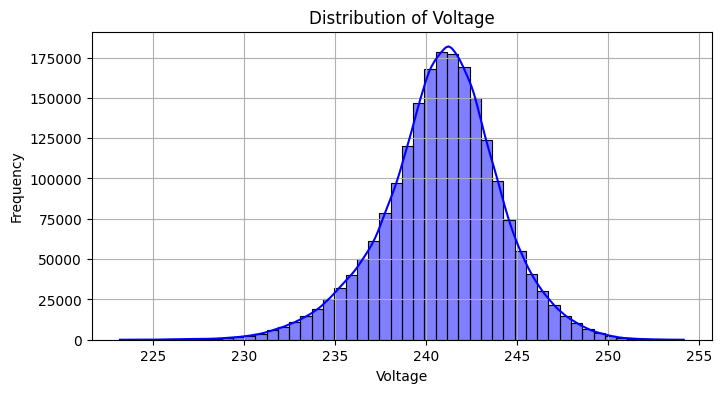

Voltage - Skewness: -0.33, Kurtosis: 0.72


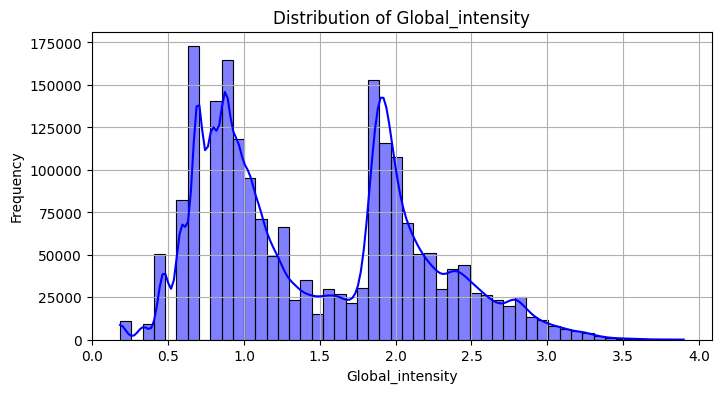

Global_intensity - Skewness: 0.39, Kurtosis: -0.92


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Plot histograms and calculate skewness and kurtosis
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=50, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

    # Print skewness and kurtosis
    print(f"{column} - Skewness: {skew(df[column]):.2f}, Kurtosis: {kurtosis(df[column]):.2f}")

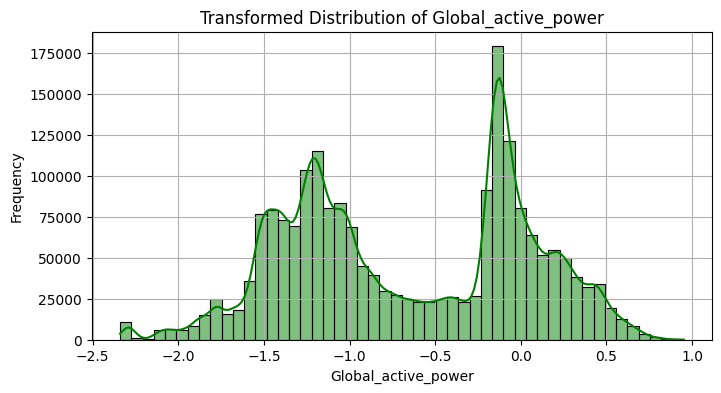

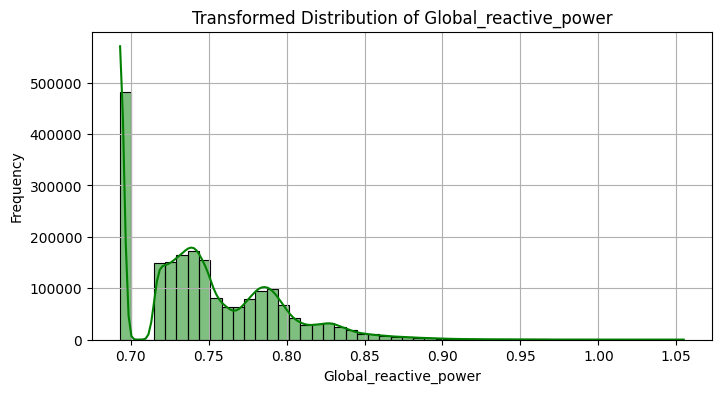

In [21]:
import numpy as np
from scipy.stats import boxcox

# Copy dataframe to apply transformations
df_transformed = df.copy()

# Apply Box-Cox or log transformation for skewed features
for column in ['Global_active_power', 'Global_reactive_power']:
    if (df[column] > 0).all():  # Box-Cox requires positive values
        df_transformed[column], _ = boxcox(df[column] + 1e-6)
    else:
        df_transformed[column] = np.log1p(df[column] - df[column].min() + 1)

# Verify the transformed data
for column in ['Global_active_power', 'Global_reactive_power']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_transformed[column], kde=True, bins=50, color='green')
    plt.title(f"Transformed Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()


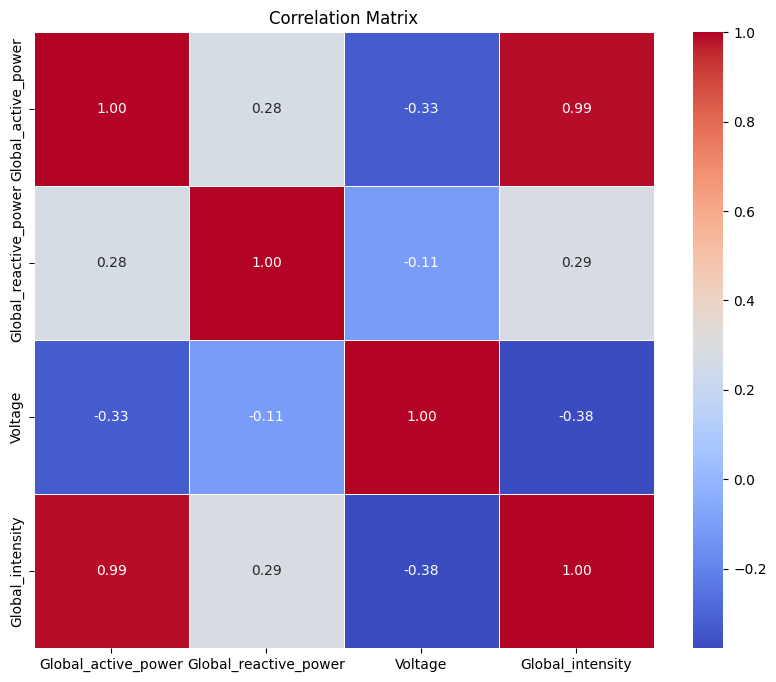

Top Correlated Features with Target:
 Global_active_power      1.000000
Global_intensity         0.985930
Global_reactive_power    0.277282
Voltage                 -0.327192
Name: Global_active_power, dtype: float64


In [22]:
# Compute correlation matrix
correlation_matrix = df_transformed.corr()

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Print top correlated features with the target
target = "Global_active_power"  # Replace with your actual target
correlations = correlation_matrix[target].sort_values(ascending=False)
print("Top Correlated Features with Target:\n", correlations)

                     Intensity_power_ratio  Reactive_voltage_interaction  \
datetime                                                                   
2024-01-01 00:00:00               0.172953                    200.575678   
2024-01-01 00:01:00               0.198810                    200.793319   
2024-01-01 00:02:00               0.199205                    204.639296   
2024-01-01 00:03:00               0.199597                    205.293152   
2024-01-01 00:04:00               0.156000                    208.671647   

                     Log_intensity  
datetime                            
2024-01-01 00:00:00       1.377575  
2024-01-01 00:01:00       1.429846  
2024-01-01 00:02:00       1.429846  
2024-01-01 00:03:00       1.429846  
2024-01-01 00:04:00       1.340611  


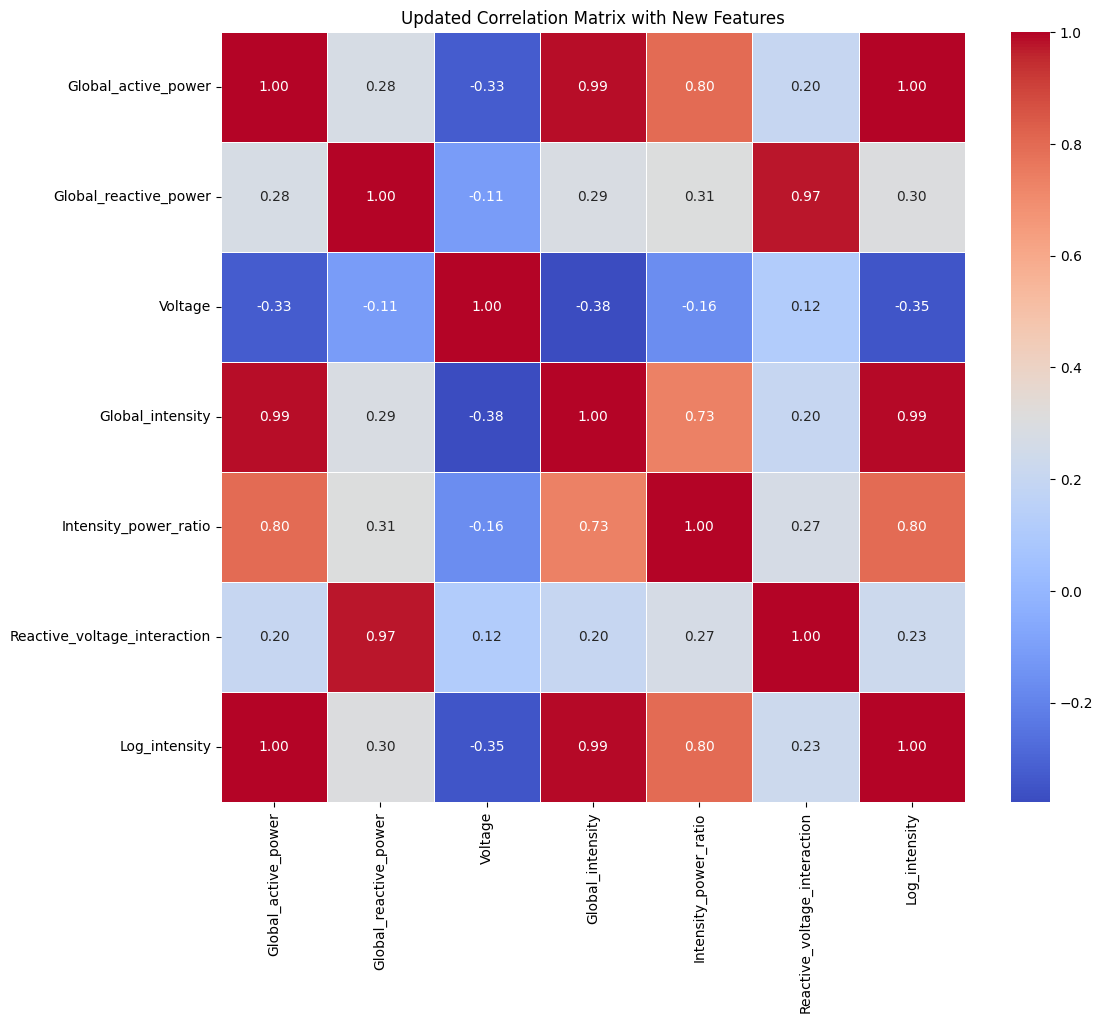

In [23]:
# Feature Engineering
df_transformed["Intensity_power_ratio"] = (
    df_transformed["Global_active_power"] / (df_transformed["Global_intensity"] + 1e-6)
)
df_transformed["Reactive_voltage_interaction"] = (
    df_transformed["Global_reactive_power"] * df_transformed["Voltage"]
)
df_transformed["Log_intensity"] = np.log1p(df_transformed["Global_intensity"])

# Verify the new features
print(df_transformed[["Intensity_power_ratio", "Reactive_voltage_interaction", "Log_intensity"]].head())

# Updated correlation matrix with new features
correlation_matrix_new = df_transformed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_new, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Updated Correlation Matrix with New Features")
plt.show()

Intensity_power_ratio - Correlation with Target: 0.80
Reactive_voltage_interaction - Correlation with Target: 0.20
Log_intensity - Correlation with Target: 1.00


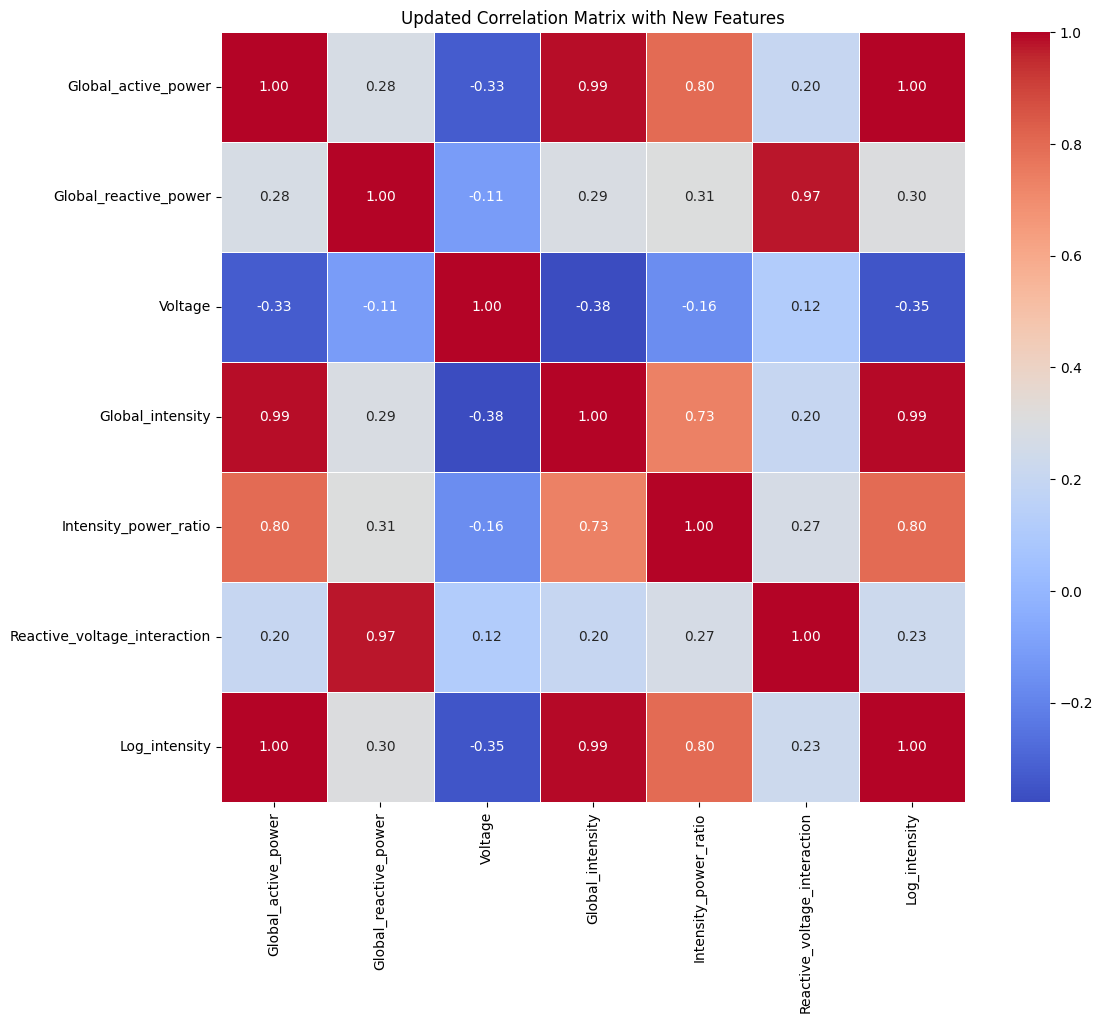

In [24]:
# Correlations of new features with target
new_features = ["Intensity_power_ratio", "Reactive_voltage_interaction", "Log_intensity"]
for feature in new_features:
    print(f"{feature} - Correlation with Target: {df_transformed[feature].corr(df_transformed['Global_active_power']):.2f}")

# Visualize updated correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_transformed.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Updated Correlation Matrix with New Features")
plt.show()


In [25]:
from sklearn.model_selection import train_test_split

# Final feature set
features = ["Log_intensity", "Intensity_power_ratio", "Global_reactive_power", "Voltage"]
X = df_transformed[features]
y = df_transformed["Global_active_power"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)

Training Features Shape: (1639424, 4)
Testing Features Shape: (409856, 4)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Baseline Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Baseline Model Performance:
Mean Squared Error (MSE): 0.00
R^2 Score: 0.99


In [27]:
print(df.columns)

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity'],
      dtype='object')


In [30]:
import numpy as np
import lightgbm as lgb

# Discretize the target
df_transformed["Power_Bins"] = pd.qcut(df_transformed["Global_active_power"], q=5, labels=False)

# Update target
y = df_transformed["Power_Bins"]

# Split data again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lgb_model.predict(X_test)

# Generate classification report
from sklearn.metrics import classification_report
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 1639424, number of used features: 4
[LightGBM] [Info] Start training from score -1.609892
[LightGBM] [Info] Start training from score -1.601221
[LightGBM] [Info] Start training from score -1.615209
[LightGBM] [Info] Start training from score -1.609642
[LightGBM] [Info] Start training from score -1.611278
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     82203
           1       0.99      0.99      0.99     82777
           2       0.99      0.99      0.99     81224
           3       1.00      1.00      1.00     81853
           4       1.00      1.00      1.00     81799

    accuracy                           1.00    409856
   macro avg       1.00      

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim

class AdvancedHybridNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, lstm_dim, attention_dim, dropout=0.3):
        super(AdvancedHybridNN, self).__init__()

        # Tabular Feature Embedding
        self.embedding = nn.Linear(input_dim, hidden_dim)

        # Sequential Model for Time Series Trends
        self.lstm = nn.LSTM(hidden_dim, lstm_dim, batch_first=True)

        # Attention Layers
        self.local_attention = nn.Sequential(
            nn.Linear(lstm_dim, attention_dim),
            nn.ReLU(),
            nn.Linear(attention_dim, 1),
            nn.Softmax(dim=1)
        )
        self.global_attention = nn.Sequential(
            nn.Linear(lstm_dim, attention_dim),
            nn.ReLU(),
            nn.Linear(attention_dim, 1),
            nn.Softmax(dim=0)
        )

        # Fully Connected Layers
        self.fc = nn.Sequential(
            nn.Linear(lstm_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)
        )

        # Auxiliary Task Layer (e.g., Variance Prediction)
        self.aux_fc = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, 1)
        )

    def forward(self, x):
        # Tabular Embedding
        x_embedded = torch.relu(self.embedding(x))

        # Sequential Modeling
        x_lstm, _ = self.lstm(x_embedded.unsqueeze(1))  # Add sequence dimension
        x_lstm = x_lstm.squeeze(1)  # Remove sequence dimension

        # Local Attention
        local_weights = self.local_attention(x_lstm)
        x_local = x_lstm * local_weights

        # Global Attention
        global_weights = self.global_attention(x_local)
        x_global = torch.sum(x_local * global_weights, dim=0)

        # Fully Connected Layer for Prediction
        prediction = self.fc(x_global)

        # Auxiliary Task (Variance Prediction)
        auxiliary_output = self.aux_fc(x_global)

        return prediction, auxiliary_output

# Define Model Parameters
input_dim = 4  # Number of features
hidden_dim = 128
lstm_dim = 64
attention_dim = 32

# Initialize Model
model = AdvancedHybridNN(input_dim, hidden_dim, lstm_dim, attention_dim)

# Optimizer and Loss Functions
criterion_primary = nn.MSELoss()  # Main Task: Regression
criterion_auxiliary = nn.L1Loss()  # Auxiliary Task
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(model)

AdvancedHybridNN(
  (embedding): Linear(in_features=4, out_features=128, bias=True)
  (lstm): LSTM(128, 64, batch_first=True)
  (local_attention): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
    (3): Softmax(dim=1)
  )
  (global_attention): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
    (3): Softmax(dim=0)
  )
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=1, bias=True)
  )
  (aux_fc): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)
